# CaesAR

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

In [2]:
def chunks(lst, n):
    ret = []
    for i in range(0, len(lst), n):
        ret.append(lst[i : i + n])
    return ret

In [3]:
CT = ""
with open("FileEncrypted.txt", "r") as f:
    CT = f.read()

We know that encrypted blocks are 16 bytes long so 32 hex chars

In [4]:
CT_32 = chunks(CT, 32)
print(len(CT_32))

C = Counter(CT_32)  # Counter is the perfect tool for frequency analysis
print(len(C))

990569
93


This is very promissing.. We have nearly 10x more elements than classes

Let's plot our distribution

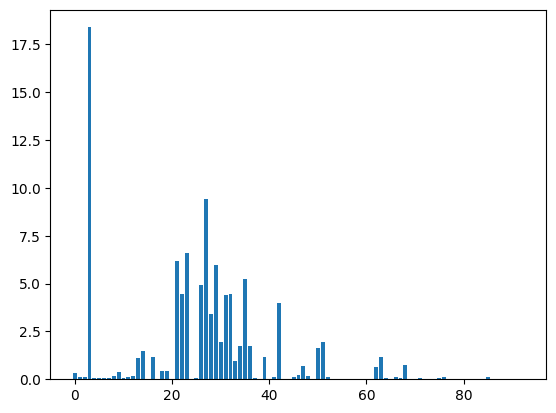

In [5]:
x = np.array(range(len(C.keys())))
y = np.array([(x / len(CT_32)) * 100 for x in C.values()])

plt.bar(x, y)
plt.show()

The most frequent character in a corpus of text is .... space!

In [6]:
most_common = [x[0] for x in C.most_common()]
print(most_common[0])

DE76BA6BDFB4367B8E405C20F51BE426


This is our "workbench", I edit the letters list (often simply making a permutiation) then observe the results, both for our word frequency and output text.

In [7]:
letters = [
    " ",
    "e",
    "t",
    "a",
    "o",
    "n",
    "h",
    "i",
    "r",
    "s",
    "d",
    "l",
    "w",
    "u",
    "g",
    "f",
    "m",
    "y",
    "c",
    ",",
    ".",
    "b",
    "p",
    "'",
    "k",
    "v",
    "\r",
    "\n",
    "I",
    "T",
    "B",
    "S",
    "F",
    "A",
    "X",
    "H",
    "-",
    ";",
    "G",
    "W",
    "M",
    "Q",
    "E",
    "R",
    "Z",
    "?",
    ":",
    "N",
    "L",
    "O",
    "D",
    "Y",
    "C",
    "U",
    "P",
    "q",
    "=",
    "0",
    "z",
    ">",
    "j",
    "V",
    "*",
    "&",
    "K",
    "#",
    "!",
    "_",
    "1",
    "J",
    "{",
    "}",
    "$",
    "2",
    "<",
    "3",
    "4",
    "0",
    "6",
    "9",
    "8",
    "7",
    "5",
    "x",
    "\""
]

Perform the substitution (this is quite slow)

In [8]:
out = ""
for chunk in CT_32:
    idx = most_common.index(chunk)
    if idx < len(letters):
        out += letters[idx]
    else:
        out += "?"

Save the result to a file for easy viewing

In [9]:
with open("out.txt", 'w') as f:
    f.write(out)

Word frequency analysis

In [10]:
Words = Counter(out.split(" "))

In [11]:
Words.most_common(30)

[('the', 10520),
 ('and', 6924),
 ('of', 4910),
 ('to', 3794),
 ('a', 3497),
 ('in', 2638),
 ('was', 2404),
 ('he', 2220),
 ('that', 2216),
 ('I', 2118),
 ('it', 1625),
 ('they', 1511),
 ('his', 1478),
 ('not', 1287),
 ('you', 1275),
 ('is', 1241),
 ('as', 1238),
 ('had', 1227),
 ('for', 1224),
 ('said', 1162),
 ('on', 1104),
 ('with', 1056),
 ('were', 1008),
 ('at', 1003),
 ('have', 963),
 ('but', 944),
 ('be', 831),
 ('from', 710),
 ('all', 696),
 ('we', 690)]

`ECW{N0wD0n'tB3H4sty,M4st3rM3r14d0c}`